In [50]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from pandas_datareader import data  
from datetime import datetime

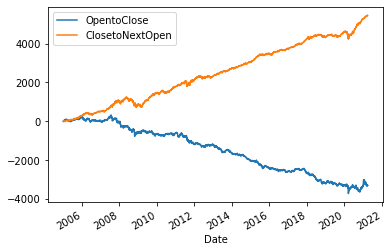

In [51]:
kospi_df['OpentoClose'] = (kospi_df['Close'] - kospi_df['Open']) # 당일 시가 매수 당일 종가 매도

kospi_df['ClosetoNextOpen'] = (kospi_df['Open'] - kospi_df['Close'].shift(1)) # 당일 종가 매수 다음날 시가 매도

overNight = kospi_df[['OpentoClose', 'ClosetoNextOpen']].fillna(0)

overNight.cumsum().plot()
plt.show()

 ## 결론 : 시가 -> 종가의 변화량 <<<<<<< 종가 -> 다음날 시가 변화량

## 지수 변화율 조사 - KOSPI

In [52]:
kospi_df['OpentoClose'] = (kospi_df['Close'] - kospi_df['Open']) * 100 / kospi_df['Open']
kospi_df['ClosetoNextOpen'] = (kospi_df['Open'] - kospi_df['Close'].shift(1)) * 100 / kospi_df['Close'].shift(1)

overnight = kospi_df[['OpentoClose', 'ClosetoNextOpen']].fillna(0)
overnight

,OpentoClose,ClosetoNextOpen
Date,,
2005-01-04,-0.410974,0.000000
2005-01-05,1.173824,-1.350777
2005-01-06,-0.791359,-0.786274
2005-01-07,-0.629873,0.583045
2005-01-10,0.155815,0.227364
...,...,...
2021-03-23,-1.102938,0.091915
2021-03-24,0.001002,-0.280221
2021-03-25,0.422615,-0.022700


In [53]:
overnight.describe()

,OpentoClose,ClosetoNextOpen
count,4006.000000,4006.000000
mean,-0.036269,0.075367
std,0.995517,0.832018
min,-10.729565,-6.541630
25%,-0.488811,-0.209451
50%,-0.025479,0.112758
75%,0.452526,0.447110
max,8.977477,7.003311


In [54]:
#수익률 확인
(overnight/100 + 1).cumprod() # 기하평균 변환

,OpentoClose,ClosetoNextOpen
Date,,
2005-01-04,0.995890,1.000000
2005-01-05,1.007580,0.986492
2005-01-06,0.999607,0.978736
2005-01-07,0.993310,0.984442
2005-01-10,0.994858,0.986680
...,...,...
2021-03-23,0.189722,17.783885
2021-03-24,0.189724,17.734051
2021-03-25,0.190525,17.730026


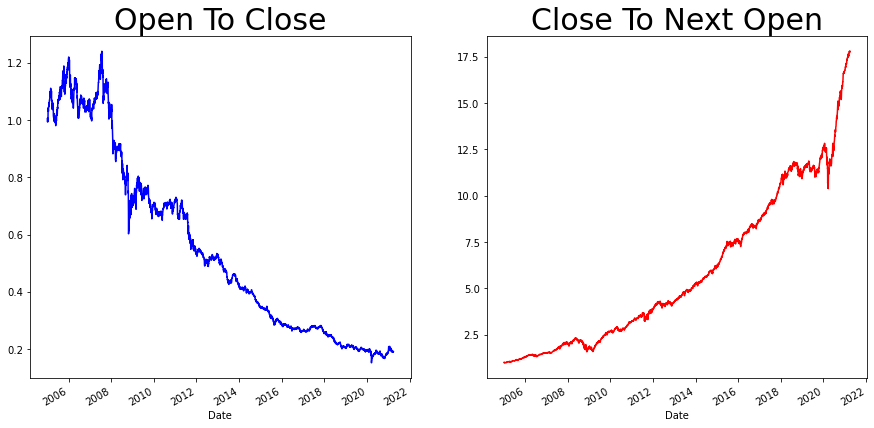

In [55]:
fig, axes = plt.subplots(1,2, figsize=(15,7))

axes[0].set_title("Open To Close",  fontsize=30)
axes[1].set_title("Close To Next Open",  fontsize=30)

(overnight/100 + 1).cumprod()['OpentoClose'].plot(ax=axes[0], color='b')
(overnight/100 + 1).cumprod()['ClosetoNextOpen'].plot(ax=axes[1], color='r')
plt.show()

## 지수 변화율 조사 - KOSDAQ

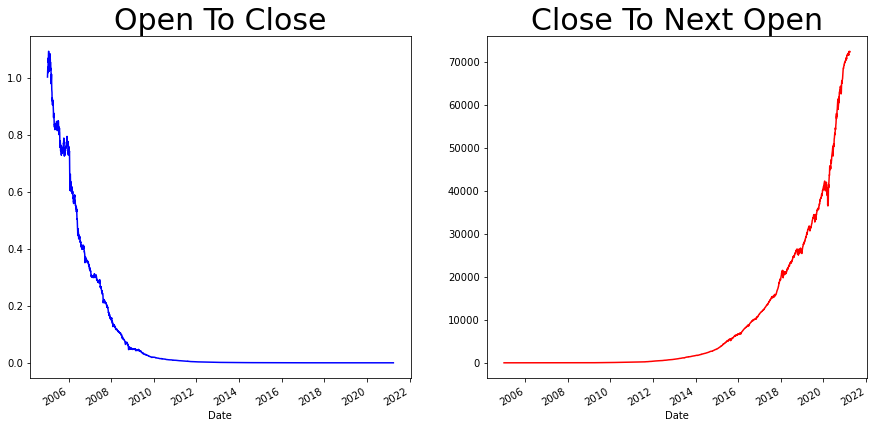

In [56]:
start_date = datetime(2005,1,1)
end_date = datetime(2021,3,29)

kosdaq_df = data.get_data_yahoo("^KQ11", start_date, end_date) 

# Overnight 수익률
kosdaq_df['OpentoClose'] = (kosdaq_df['Close'] - kosdaq_df['Open']) * 100 / kosdaq_df['Open']
kosdaq_df['ClosetoNextOpen'] = (kosdaq_df['Open'] - kosdaq_df['Close'].shift(1)) * 100 / kosdaq_df['Close'].shift(1)

overnight = kosdaq_df[['OpentoClose', 'ClosetoNextOpen']].fillna(0)

# 수익률 -> 기하평균
geo = (overnight/100 + 1).cumprod()

fig, axes = plt.subplots(1,2, figsize=(15,7))

axes[0].set_title("Open To Close",  fontsize=30)
axes[1].set_title("Close To Next Open",  fontsize=30)

geo['OpentoClose'].plot(ax=axes[0], color='b')
geo['ClosetoNextOpen'].plot(ax=axes[1], color='r')
plt.show()

## 지수 변화율 조사 - S&P500

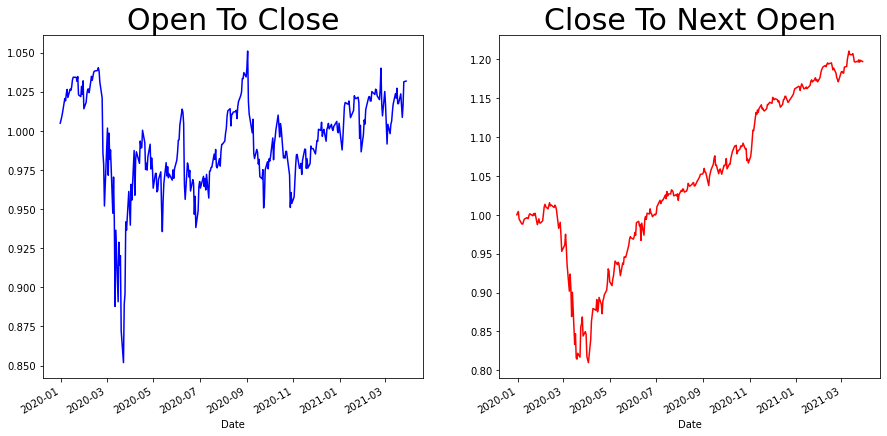

In [57]:
start_date = datetime(2020,1,1)
end_date = datetime(2021,3,29)

kosdaq_df = data.get_data_yahoo("^GSPC", start_date, end_date) 

# Overnight 수익률
kosdaq_df['OpentoClose'] = (kosdaq_df['Close'] - kosdaq_df['Open']) * 100 / kosdaq_df['Open']
kosdaq_df['ClosetoNextOpen'] = (kosdaq_df['Open'] - kosdaq_df['Close'].shift(1)) * 100 / kosdaq_df['Close'].shift(1)

overnight = kosdaq_df[['OpentoClose', 'ClosetoNextOpen']].fillna(0)

# 복리 수익률
geo = (overnight/100 + 1).cumprod()


fig, axes = plt.subplots(1,2, figsize=(15,7))

axes[0].set_title("Open To Close",  fontsize=30)
axes[1].set_title("Close To Next Open",  fontsize=30)

geo['OpentoClose'].plot(ax=axes[0], color='b')
geo['ClosetoNextOpen'].plot(ax=axes[1], color='r')
plt.show()

### 종목별 효과

검색하고자 하는 종목코드를 입력하세요
035720 005380 005930 000660


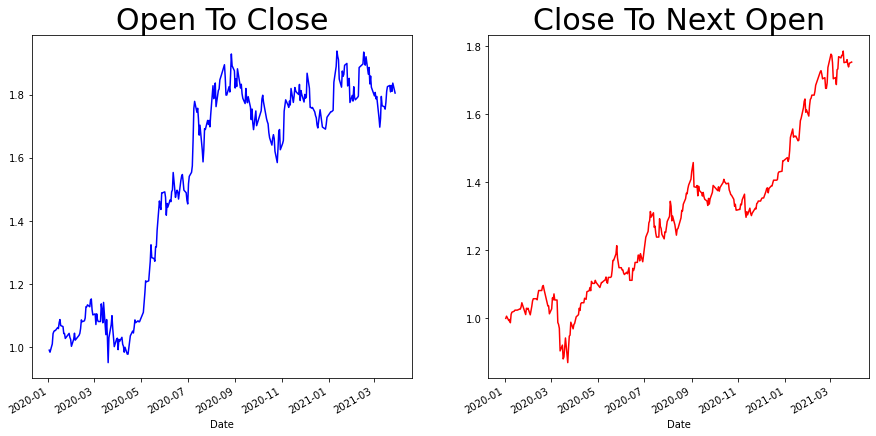

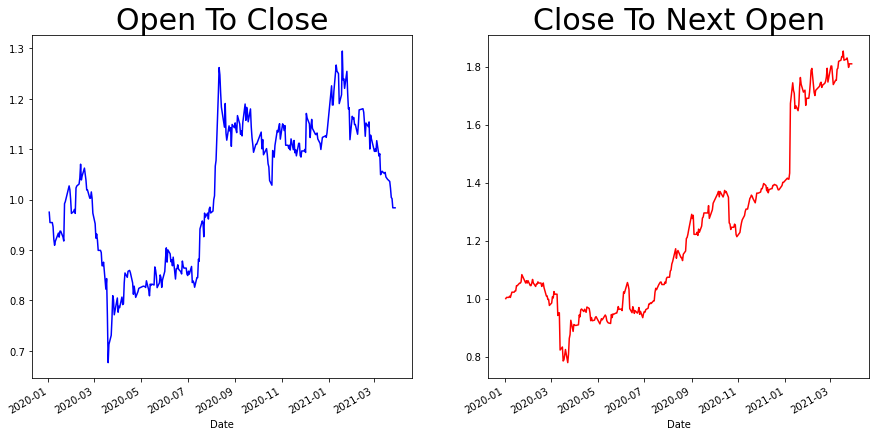

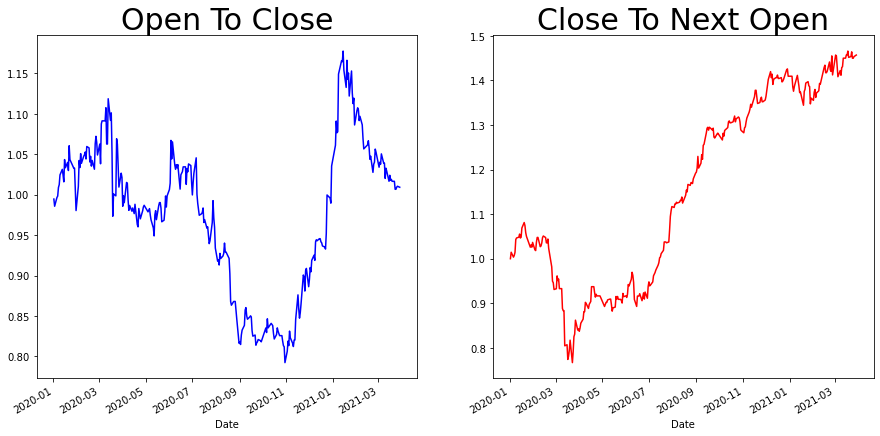

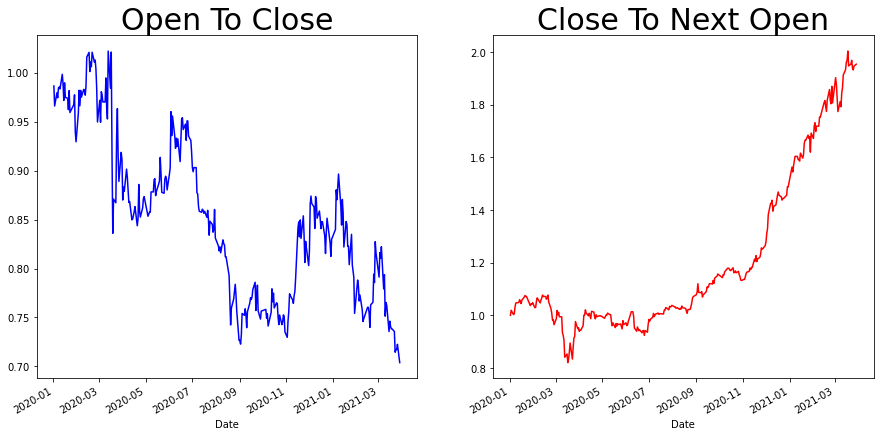

In [59]:
start_date = datetime(2020,1,1)
end_date = datetime(2021,3,29)

# 카카오 035720, 현대차 005380, 삼성전자 005930, 하이닉스 000660
print("검색하고자 하는 종목코드를 입력하세요")
code_list = list(input().split(' '))
for code in code_list:
    try:
        stock_df = data.get_data_yahoo(code+".KS", start_date, end_date) #KOSPI검색
    except:
        stock_df = data.get_data_yahoo(code+".KQ", start_date, end_date) #아닐시 KOSDAQ 검색

    # Overnigh 수익률
    stock_df['OpentoClose'] = (stock_df['Close'] - stock_df['Open']) * 100 / stock_df['Open']
    stock_df['ClosetoNextOpen'] = (stock_df['Open'] - stock_df['Close'].shift(1)) * 100 / stock_df['Close'].shift(1)

    overnight = stock_df[['OpentoClose', 'ClosetoNextOpen']].fillna(0)

    # 수익률 -> 기하평균
    geo = (overnight/100 + 1).cumprod()

    fig, axes = plt.subplots(1,2, figsize=(15,7))

    axes[0].set_title("Open To Close",  fontsize=30)
    axes[1].set_title("Close To Next Open",  fontsize=30)

    geo['OpentoClose'].plot(ax=axes[0], color='b')
    geo['ClosetoNextOpen'].plot(ax=axes[1], color='r')
    plt.show()